In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option("display.max_columns", None)


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/IMDB_DataCleaning/main/movies_metadata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.shape

(45466, 24)

In [4]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
data.shape

(45466, 24)

In [6]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## Adult

In [7]:
data.adult.values # data.column_name.values

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [8]:
#data.loc[1,'adult'] ## adult -> convert to boolean
data.adult.unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

**Issues:**
- Feature: Adult expected to be an bool, but is read as obj.
- These are classes other than Bool class in the feature: Adult.

In [9]:
data.loc[~data.adult.isin(['True','False']),:] # data.loc[row_criteria,col_criter]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From above data, we see 3 records don't have bool values for Feature: Adult. Lets fetch the rows that has bool values in Feature: Adult and remove the rest

In [10]:
data = data.loc[data.adult.isin(['False','True']),:] # only choosing the rows where the adult column is either true or false
data.adult.unique(), data.shape

(array(['False', 'True'], dtype=object), (45463, 24))

Map the Objects to Bool Dtypes

In [11]:
data.adult = data.adult.map({'True':True,'False':False}) #convert from string to True/False


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
data.adult.dtype

dtype('bool')

In [13]:
data.adult.isnull().sum()

0

# Belongs to Collection

In [14]:
import numpy as np
data.iloc[0:3]["belongs_to_collection"]

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
Name: belongs_to_collection, dtype: object

**Issues in Feature: Belongs_to_columns:**
- Nan values --> "No Collection"
- non-nan --> convert the string into a dictionary(ast.literal_eval) and take the name value of the dictionary as name of the collection

all elements : (check if that value is ) str -> dict -> Name

In [15]:
import ast
import numpy as np

collectionNames = [] #list to store collections names - list that is going to store the vleaned value
for i in data['belongs_to_collection'].values: #Iterating through the column
    if i == i: # check if it is nan 
      collectionNames.append(ast.literal_eval(i)['name'])
    else: # a nan value
      collectionNames.append("No Collection") #append -1

data['collectionName'] = collectionNames
data = data.drop(columns = ['belongs_to_collection'])

In [16]:
data.collectionName

0                  Toy Story Collection
1                         No Collection
2             Grumpy Old Men Collection
3                         No Collection
4        Father of the Bride Collection
                      ...              
45461                     No Collection
45462                     No Collection
45463                     No Collection
45464                     No Collection
45465                     No Collection
Name: collectionName, Length: 45463, dtype: object

# Budget

In [17]:
data["budget"]

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45463, dtype: object

**Issues:**
- Budget: Object --> int

In [18]:
data.budget = data.budget.astype('int64') # explicilty type casting
data.budget.describe() #summary stats

count    4.546300e+04
mean     4.224579e+06
std      1.742413e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [19]:
sum(data.budget == 0)

36573

In [20]:
sum(data.budget == 0)*100/data.shape[0]

80.44563711149726

**Inference:**
From above data, ~80% of data in budge column is 0. The below can be followed:
- Dont use budget
- Try to look for some other dataset where these details are available
- Bite the bullet and only do analysis with the rest of the data

In [21]:
data

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionName
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,No Collection
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,No Collection
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,No Collection
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,No Collection
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,No Collection
45464,False,0,[],NaN,227506,tt0008536

# Genres

In [22]:
data.genres.values[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

The feature: Genres is Unstructured(List of dictionaries) and also in String format.
- Convert String to respective datatype
- Fetch the required data from list of dictionaries.

In [23]:
ast.literal_eval(data.genres.values[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

A movie can have more than one Genres. Create a column for each genre - say 1 if the movie has the genre, else put 0

Lets look at the data and find put all the unique genres that are there in my data


In [24]:
uniqueGenres = set()

for record in data.genres: # I am looping through all the rows
  genList = ast.literal_eval(record) # convert from string to list of dict
  for i in genList: # loop through the list of dict
    uniqueGenres.add(i['name']) # add the name of the genre to my uniqueGenres variabe


In [25]:
len(uniqueGenres)

20

In [26]:
rows = [] # for all the movies
genres = list(uniqueGenres) # all unique Genres

for i in data.genres: #looping through all the rows
  genList = ast.literal_eval(i) #converting from string to list of dict for a particular movie
  movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
  row = [] # store a list of 1s and 0s for one movie
  for i in genres: #loop through all unique genres
    row.append(int(i in movieGenres)) #checking if the genre is present in that movie - if the genre is present 1 else 0
  rows.append(row)

In [27]:
genre = pd.DataFrame(rows,columns = genres)
genre

,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
45459,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45460,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
45461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
genre.shape

(45463, 20)

In [29]:
data = pd.concat([data,genre], axis = 1) # joing the two dataframes
data.shape, genre.shape

((45466, 44), (45463, 20))

In [30]:
data = data.drop(columns = ['genres'])

## Home Page

In [31]:
data.homepage.values[1]

nan

In [32]:
~data.homepage.isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
45461     True
45462    False
45463    False
45464    False
45465    False
Name: homepage, Length: 45466, dtype: bool

In [33]:
data.homepage.isnull().sum()*100/data.shape[0]

82.89051159107905

In [34]:
data['homePagePresent'] = (~data.homepage.isnull()) #fasle- if null in home page else true

In [35]:
data = data.drop(columns = ['homepage'])

In [36]:
data.homePagePresent = data.homePagePresent.map({True:1,False:0})

In [37]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionName,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary,homePagePresent
0,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,False,65000000.0,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,False,0.0,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,False,16000000.0,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,No Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,False,0.0,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0.0,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
45462,False,0.0,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45463,False,0.0,67758,tt0303758,en,Betrayal,"When one of

# Id

In [38]:
(data.shape[0] - len(data.id.unique())) #difference between movies and unique ids


32

In [39]:
data = data.drop_duplicates(subset = 'id') # delete the rows which has id column to be the same
data.shape

(45434, 43)

In [40]:
(data.shape[0] - len(data.id.unique()))

0

In [41]:
data.id.values[0]

'862'

In [42]:
data = data.dropna(subset = ['id'] )

In [43]:
data.id = data.id.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
data.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45433, dtype: int64

In [45]:
data.imdb_id.values[0]

'tt0114709'

In [46]:
data.imdb_id.values[0]
(data.shape[0] - len(data.imdb_id.unique()))
data = data.drop_duplicates(subset = 'imdb_id')

# Original Language

In [47]:
data.original_language.values[0]

'en'

In [48]:
len(data.original_language.unique())
data.original_language.value_counts()
data.original_language.isnull().sum()
# # #data.loc[data.original_language.isnull(),:]
data['original_language'] = data.original_language.fillna('mode')

In [49]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'collectionName', 'Romance',
       'Action', 'TV Movie', 'Comedy', 'Crime', 'Science Fiction', 'Horror',
       'War', 'Music', 'History', 'Family', 'Thriller', 'Mystery', 'Drama',
       'Animation', 'Fantasy', 'Foreign', 'Adventure', 'Western',
       'Documentary', 'homePagePresent'],
      dtype='object')

# Title

In [50]:
data.title.isnull().sum(), len(data.title.unique())*100/data.shape[0]

(3, 93.05986745051412)

In [51]:
data.original_title.isnull().sum(), len(data.original_title.unique())*100/data.shape[0]

(0, 95.464253473369)

Comparing Title vs Original Title, we see the feature: Original Data has more details comparing to Title. Hence dropping Feature: Title

In [52]:
data = data.drop(columns = ['title'])

In [53]:
data.original_title.values[0]

'Toy Story'

1) lower case upper case
2) remove unwanted spaces (data science, data  science)
3) checking spelling mistakes -> for places where there are a lot of chracters (textBlob)
4) handling special characters

In [54]:
data.original_title = data['original_title'].str.lower() # brinf the text data to lowercase
data.original_title = data['original_title'].str.strip() # delete unwanted whtespaces

In [55]:
data.original_title

0                          toy story
1                            jumanji
2                   grumpier old men
3                  waiting to exhale
4        father of the bride part ii
                    ...             
45461                        رگ خواب
45462            siglo ng pagluluwal
45463                       betrayal
45464            satana likuyushchiy
45465                       queerama
Name: original_title, Length: 45417, dtype: object

# Overview

In [56]:
data.overview.values[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [57]:
data.overview = data.overview.str.lower()
data.overview = data.overview.str.strip()
data.overview

0        led by woody, andy's toys live happily in his ...
1        when siblings judy and peter discover an encha...
2        a family wedding reignites the ancient feud be...
3        cheated on, mistreated and stepped on, the wom...
4        just when george banks has recovered from his ...
                               ...                        
45461          rising and falling between a man and woman.
45462    an artist struggles to finish his work while a...
45463    when one of her hits goes wrong, a professiona...
45464    in a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45417, dtype: object

In [58]:
data.overview.isnull().sum()

952

In [59]:
data.loc[data.overview.isnull(),'overview'] = 'no overview available'

# Popularity

In [60]:
data.popularity.values[0]

21.946943

In [61]:
data.popularity.dtype

dtype('O')

In [62]:
data.popularity = data.popularity.astype('float64') ##floating point value
data.popularity.describe()

# #Z-score
# data['z_score_popularity'] = (data.popularity - data.popularity.mean())/data.popularity.std()
# data['outliers'] = (data['z_score_popularity'] > 3) | (data['z_score_popularity'] < -3)

count    45414.000000
mean         2.921932
std          6.007588
min          0.000000
25%          0.386107
50%          1.127685
75%          3.679143
max        547.488298
Name: popularity, dtype: float64

In [63]:
#IQR
q3 = data.popularity.quantile(0.75)
q1 = data.popularity.quantile(0.25)
iqr = q3 - q1 

In [64]:
#thresholds
q3 + (1.5 * iqr)

8.618696

In [65]:
q1 - (1.5*iqr)

-4.553446

In [66]:
##outlier detection - 1) domain knowledge 2) u need to handle them
data.popularity = data.popularity.clip(-4.55,8.62) #.clip(lt,ut)
#data = data.loc[(data.popularity > 0) & (data.popularity <= 100),:]

In [67]:
data.popularity.describe()

count    45414.000000
mean         2.459170
std          2.831027
min          0.000000
25%          0.386107
50%          1.127685
75%          3.679143
max          8.620000
Name: popularity, dtype: float64

In [68]:
sum(data.popularity.isnull())

3

In [69]:
data = data.dropna(subset = ['popularity']) #find all the null values in my popularity column and delete them 

In [70]:
sum(data.popularity.isnull())

0

# Vote Count and Vote Average

In [71]:
data.vote_count.values[0]

5415.0

In [72]:
sum(data.vote_count.isnull())

0

In [73]:
data.vote_count.describe()
#data.vote_count.quantile(0.99)
data.vote_count.isna().sum()
# data = data.dropna(subset = ['vote_count'])


0

In [74]:
data.vote_average.values[0]

7.7

In [75]:
data.vote_average.isnull().sum()

0

In [76]:
data.vote_average.describe()

count    45414.000000
mean         5.618864
std          1.923210
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [77]:
data['score'] = (data.vote_average * data.vote_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Poster Path

In [78]:
data.poster_path.values[0] #null value, unique values, file exists in the path or not

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [79]:
data.poster_path.isnull().sum()

378

In [80]:
import os
data.poster_path.map(lambda x  : os.path.isfile(str(x)))
#os.path.isfile('/content/movies_metadata.csv')

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: poster_path, Length: 45414, dtype: bool

In [81]:
data = data.drop(columns = ['poster_path'])

# Production Companies

In [82]:
data.production_companies.values[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [83]:
data.production_companies.isnull().sum()

0

In [84]:
data.production_companies.values[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [85]:
#Code for extracting Producer 1
import ast
index = 0
prod1 = [] #empty list which is going to store producer 1's name

for prod in data.production_companies.values: # looping through all rows
  prodList = ast.literal_eval(prod) #string -> list of dicts #for each movie, prodList will contain the set of all the producers
  if len(prodList) > index:  # if they have atleast 1 producer
    prod1.append(prodList[index]['name']) #note the name of producer
  else:
    prod1.append('No Producer') #put them as no producer

data['Producer1'] = prod1

In [86]:
# Code for extracting producer 2
import ast
index = 1
prod2 = []

for prod in data.production_companies.values:
  prodList = ast.literal_eval(prod)
  if len(prodList) > index:
    prod2.append(prodList[index]['name'])
  else:
    prod2.append('No Producer')

data['Producer2'] = prod2

In [87]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionName,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary,homePagePresent,score,Producer1,Producer2
0,False,30000000.0,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",8.620000,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,Toy Story Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,41695.5,Pixar Animation Studios,No Producer
1,False,65000000.0,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,8.620000,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,16649.7,TriStar Pictures,Teitler Film
2,False,0.0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,8.620000,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,Grumpy Old Men Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,598.0,Warner Bros.,Lancaster Gate
3,False,16000000.0,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,No Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,207.4,Twentieth Century Fox Film Corporation,No Producer
4,False,0.0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,Father of the Bride Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,986.1,Sandollar Productions,Touchstone Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0.0,439050,tt6209470,fa,رگ خواب,rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,No Producer,No Producer
45462,False,0.0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0,Sine Olivia,No Producer
45463,False,0.0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,"

In [88]:
data = data.drop(columns = ['production_companies'])

In [89]:
data['Producer1'] = data['Producer1'].str.lower()
data['Producer2'] = data['Producer2'].str.lower()
data['Producer1'] = data['Producer1'].str.strip()
data['Producer2'] = data['Producer2'].str.strip()

In [90]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionName,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary,homePagePresent,score,Producer1,Producer2
0,False,30000000.0,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,Toy Story Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,41695.5,pixar animation studios,no producer
1,False,65000000.0,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,16649.7,tristar pictures,teitler film
2,False,0.0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,Grumpy Old Men Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,598.0,warner bros.,lancaster gate
3,False,16000000.0,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,No Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,207.4,twentieth century fox film corporation,no producer
4,False,0.0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,Father of the Bride Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,986.1,sandollar productions,touchstone pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0.0,439050,tt6209470,fa,رگ خواب,rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,no producer,no producer
45462,False,0.0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0,sine olivia,no producer
45463,False,0.0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0,No Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22.8,american world pictures,no producer
45464,False,0.0,227506,tt00

# Release Dates

In [91]:
data.release_date.values[0]

'1995-10-30'

In [92]:
data.release_date.isnull().sum()

81

In [93]:
data.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45414, dtype: object

In [94]:
data = data.dropna(subset = ['release_date'])


In [95]:
import datetime
dateString = 'April/2022/01::19:05:00'
date = datetime.datetime.strptime(dateString, "%B/%Y/%d::%H:%M:%S") #string to datetime#
#datetime.datetime.strftime((date + datetime.timedelta(days = 2, hours = 2)),"%d-%b-%y-%H:%M:%S")
# #date
(date - datetime.timedelta(days = 90))
#date.month
date.weekday()

4

In [96]:
data.release_date = pd.to_datetime(data.release_date, format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
data.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45460   1991-05-13
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45333, dtype: datetime64[ns]

# Revenues

In [98]:
data.revenue.values[0]

373554033.0

In [99]:
data.revenue = data.revenue.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [100]:
data.revenue.describe()

count    4.533300e+04
mean     1.123688e+07
std      6.441885e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [101]:
sum(data.revenue == 0)*100/data.shape[0]

83.68296825711954

# RunTime

In [102]:
data.runtime.values[0]

81.0

In [103]:
data.runtime.describe()

count    45089.000000
mean        94.184014
std         38.342419
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [104]:
sum(data.runtime == 0)

1532

In [105]:
data.loc[data.runtime == 0,'runtime']  = 95

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [106]:
sum(data.runtime > 240)

194

In [107]:
data.loc[data.runtime > 300, :]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionName,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary,homePagePresent,score,Producer1,Producer2
6747,False,0.0,42044,tt0090015,en,shoah,claude lanzmann directed this 9 1/2 hour docum...,1.978031,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1985-11-01,0,566.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,False,8.7,36.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,313.2,british broadcasting corporation (bbc),ministère de la culture de la republique franç...
7415,False,0.0,140207,tt0080297,en,tinker tailor soldier spy,"in the bleak days of the cold war, espionage v...",1.564586,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1979-09-10,0,320.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.6,10.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,76.0,bbc,no producer
7420,False,0.0,11659,tt0346336,it,la meglio gioventú,"spanning four decades, from the chaotic 1960s ...",6.040001,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",2003-05-19,0,366.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,The Possibilities Were Endless...,False,8.0,88.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,704.0,rai cinemafiction,bibi film
7933,False,0.0,36627,tt0072021,pl,potop,"following with fire and sword', this is an ada...",0.868637,"[{'iso_3166_1': 'PL', 'name': 'Poland'}]",1974-09-02,0,315.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}]",Released,Academy Award Nominee,False,7.4,7.0,Trylogia Sienkiewicza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,51.8,dovzhenko film studios,belarusfilm
8635,False,100000000.0,29266,tt0063794,ru,война и мир,seven-hour epic based on the eponymous book by...,2.604571,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1966-03-14,0,422.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,False,7.5,16.0,No Collection,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,120.0,mosfilm,no producer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44176,False,0.0,444623,tt0366028,ru,idiot,tv miniseries of the dostoevsky novel.,0.074146,[],2003-04-01,0,550.0,[],Released,NaN,False,7.0,1.0,No Collection,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0,no producer,no producer
44464,False,0.0,197854,tt0143353,ja,強殖装甲ガイバー,sho and his friend tetsurou stumble upon an od...,0.025827,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1989-09-25,0,360.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,False,6.2,5.0,No Collection,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,31.0,animate-film,no producer
44721,False,0.0,458298,tt6792200,en,the keepers,a seven-part docuseries about the unsolved mur...,1.576170,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-05-19,0,432.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who killed Sister Cathy?,False,7.9,16.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,126.4,netflix,film 45
44758,False,0.0,128733,tt0080230,en,hollywood,the definitive documentary about the american ...,0.055713,[],1980-02-09,0,780.0,[],Released,NaN,False,8.0,1.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.0,no producer,no producer


In [108]:
data.runtime.isnull().sum()

244

In [109]:
data.runtime = data.runtime.fillna(data.runtime.median())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
data.runtime.isnull().sum()

0

# Spoken Languages

In [111]:
data.spoken_languages.values[0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [112]:
import ast
totalLanguages = []

for prod in data.spoken_languages.values: # looping through all the rows
  prodList = ast.literal_eval(prod) #converting from string to list of dictionary 
  totalLanguages.append(len(prodList)) #how many languages spoken?

data['TotalLanguages'] = totalLanguages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
data = data.drop(columns = ['spoken_languages'])

In [114]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionName,Romance,Action,TV Movie,Comedy,Crime,Science Fiction,Horror,War,Music,History,Family,Thriller,Mystery,Drama,Animation,Fantasy,Foreign,Adventure,Western,Documentary,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,False,30000000.0,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415.0,Toy Story Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,41695.5,pixar animation studios,no producer,1
1,False,65000000.0,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,16649.7,tristar pictures,teitler film,2
2,False,0.0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,8.620000,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,Grumpy Old Men Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,598.0,warner bros.,lancaster gate,1
3,False,16000000.0,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0,No Collection,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,207.4,twentieth century fox film corporation,no producer,1
4,False,0.0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,Father of the Bride Collection,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0.0,30840,tt0102797,en,robin hood,"yet another version of the classic epic, with ...",5.683753,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0,104.0,Released,NaN,False,5.7,26.0,No Collection,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,148.2,westdeutscher rundfunk (wdr),working title films,1
45462,False,0.0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0,360.0,Released,NaN,False,9.0,3.0,No Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0,sine olivia,no producer,1
45463,False,0.0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0,90.0,Released,A deadly game of wits.,False,3.8,6.0,No Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22.8,american world pictures,no producer,1
45464,False,0.0,227506,tt0008536,en,satana likuyushchiy,"in a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0,87.0,Released,NaN,False,0.0,0.0,No Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,yermoliev,no producer,0


# Status

In [115]:
data.status.values[0]

'Released'

In [116]:
data.status.value_counts()

Released           44896
Rumored              227
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [117]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'collectionName', 'Romance', 'Action',
       'TV Movie', 'Comedy', 'Crime', 'Science Fiction', 'Horror', 'War',
       'Music', 'History', 'Family', 'Thriller', 'Mystery', 'Drama',
       'Animation', 'Fantasy', 'Foreign', 'Adventure', 'Western',
       'Documentary', 'homePagePresent', 'score', 'Producer1', 'Producer2',
       'TotalLanguages'],
      dtype='object')

# Others

In [118]:
data = data.drop(columns = ['production_countries'])

In [119]:
data = data.drop(columns = ['video','tagline'])

# Final Data

In [120]:
data = data.dropna()

In [121]:
data.shape

(45249, 40)

In [122]:
dataBudgetRevenue  = data.loc[(data.budget != 0) & (data.revenue != 0),:]
dataBudgetRevenue.shape

(5375, 40)

In [123]:
# dataBudgetRevenue.to_csv('finalCleanedData.csv')
# dataBudgetRevenue.columns
dataBudgetRevenue['profit'] = (dataBudgetRevenue.revenue - dataBudgetRevenue.budget)/dataBudgetRevenue.budget
#dataBudgetRevenue['profit%'].describe()
dataBudgetRevenue['profit'] = dataBudgetRevenue['profit'].clip(-1,50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [124]:
dataBudgetRevenue.to_csv('finalCleanedData.csv')

1. Profit = (Revenue - Budget)/Budget
2. Do the movies that have high vote_avergae make lot of profits ? 
3. What genres make the most money?
4. Which producers generally do well? 
5. Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?
6. Will a longer run time bring higher profits?
7. Does the presence of a homepage indicate higher profits
8. Which languages rakes in high profit
9. Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ? 
10. If the movie speaks multiple languages, is the profit % higher?

In [125]:
averageProfitForBin = [dataBudgetRevenue.loc[(dataBudgetRevenue.vote_average < (i)) & (dataBudgetRevenue.vote_average > (i-1)),'profit'].median() for i in range(1,11)]

In [126]:
averageProfitForBin

[nan,
 -0.9488571428571428,
 -0.7817333333333333,
 -0.21775732535885167,
 -0.024992675,
 0.4854133258064516,
 1.149760683068783,
 2.55925,
 4.430045643243243,
 6.575757575757576]

Text(0.5, 1.0, 'Vote vs Profit')

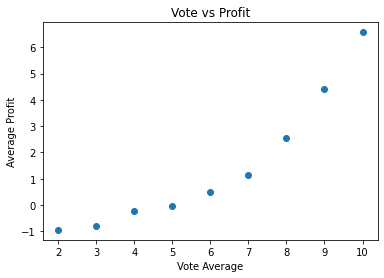

In [127]:
import matplotlib.pyplot as plt
plt.scatter(x = [1,2,3,4,5,6,7,8,9,10], y = averageProfitForBin)
plt.xlabel('Vote Average')
plt.ylabel('Average Profit')
plt.title('Vote vs Profit')

In [128]:
dataBudgetRevenue.profit

0        11.451801
1         3.043035
3         4.090760
5         2.123947
8         0.838576
           ...    
45250     0.583333
45399    -0.999996
45409     0.660765
45412    -0.365604
45422    -0.717400
Name: profit, Length: 5375, dtype: float64